In [2]:
import os 
os.chdir('modules')
import forecaster as fc

In [3]:
# Loading data
data = fc.retrieve_data()

In [4]:
# Params for tuner
params = {
    'changepoint_prior_scale':[0.01,0.1,0.25,0.5],
    'seasonality_prior_scale':[0.01,0.1,0.5,1.0,5.0,10.0],
    'changepoint_range':[0.8,0.95]
}

In [5]:
# Getting the best parameters for prophet.
best = fc.hyper_tuner(data, params)

  0%|          | 0/48 [00:00<?, ?it/s]

In [6]:
# Printing out the best param map.
best

{'changepoint_prior_scale': 0.1,
 'seasonality_prior_scale': 0.01,
 'changepoint_range': 0.8}

In [7]:
# Fitting the data and retrieving the forecast and model.
f, m = fc.fit_predict_model(data, *best.values())

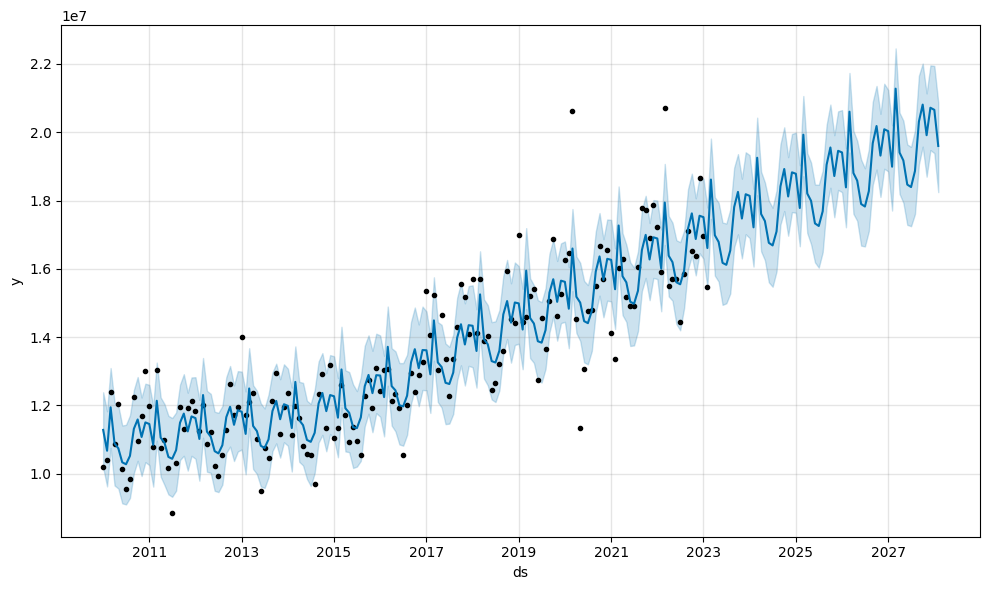

In [8]:
# Plotting the forecast.
fc.plot_prediction(m, f)

In [9]:
# Evaluating the model
fc.evaluate_model(m)

MAPE: 6.158%
MDAPE: 5.047%
SMAPE: 6.029%


In [10]:
# marking the anomalies in data
an = fc.detect_anomalies(f)

In [11]:
# Cleaning the dataframe from the anomalous data.
clean = fc.remove_anomalies(data, an)

In [12]:
best2 = fc.hyper_tuner(clean, params)

  0%|          | 0/48 [00:00<?, ?it/s]

In [13]:
best2

{'changepoint_prior_scale': 0.1,
 'seasonality_prior_scale': 0.1,
 'changepoint_range': 0.8}

In [14]:
f2, m2 = fc.fit_predict_model(clean, *best2.values())

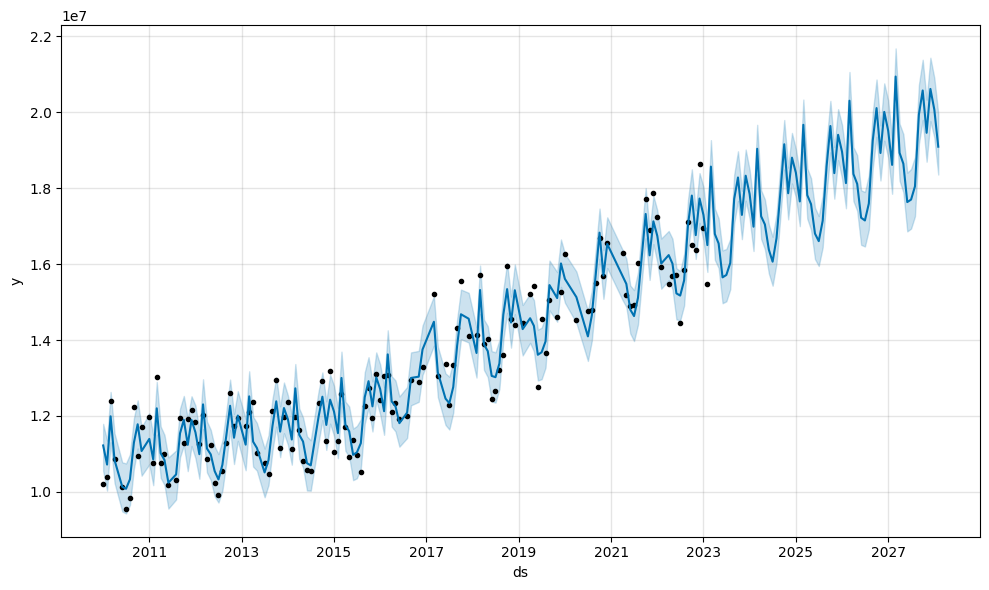

In [15]:
fc.plot_prediction(m2, f2)

In [16]:
fc.evaluate_model(m2)

MAPE: 4.270%
MDAPE: 3.799%
SMAPE: 4.263%


In [17]:
f2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat,fact
0,2010-01-01,1.089423e+07,1.055076e+07,1.179195e+07,1.089423e+07,1.089423e+07,0.030159,0.030159,0.030159,0.030159,0.030159,0.030159,0.0,0.0,0.0,1.122278e+07,10205914.0
1,2010-02-01,1.090848e+07,1.003251e+07,1.135301e+07,1.090848e+07,1.090848e+07,-0.017300,-0.017300,-0.017300,-0.017300,-0.017300,-0.017300,0.0,0.0,0.0,1.071976e+07,10390060.0
2,2010-03-01,1.092135e+07,1.130614e+07,1.263333e+07,1.092135e+07,1.092135e+07,0.097897,0.097897,0.097897,0.097897,0.097897,0.097897,0.0,0.0,0.0,1.199052e+07,12392784.0
3,2010-04-01,1.093560e+07,1.023772e+07,1.154072e+07,1.093560e+07,1.093560e+07,-0.008926,-0.008926,-0.008926,-0.008926,-0.008926,-0.008926,0.0,0.0,0.0,1.083799e+07,10876033.0
4,2010-06-01,1.096365e+07,9.484466e+06,1.077759e+07,1.096365e+07,1.096365e+07,-0.075587,-0.075587,-0.075587,-0.075587,-0.075587,-0.075587,0.0,0.0,0.0,1.013494e+07,10134094.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2027-10-01,1.934895e+07,1.979758e+07,2.138534e+07,1.892865e+07,1.979249e+07,0.063368,0.063368,0.063368,0.063368,0.063368,0.063368,0.0,0.0,0.0,2.057506e+07,NaN
189,2027-11-01,1.939469e+07,1.869794e+07,2.033077e+07,1.896322e+07,1.985441e+07,0.003374,0.003374,0.003374,0.003374,0.003374,0.003374,0.0,0.0,0.0,1.946012e+07,NaN
190,2027-12-01,1.943896e+07,1.976523e+07,2.143811e+07,1.899731e+07,1.991007e+07,0.060525,0.060525,0.060525,0.060525,0.060525,0.060525,0.0,0.0,0.0,2.061551e+07,NaN
191,2028-01-01,1.948470e+07,1.934108e+07,2.090706e+07,1.903482e+07,1.996941e+07,0.030046,0.030046,0.030046,0.030046,0.030046,0.030046,0.0,0.0,0.0,2.007014e+07,NaN


In [57]:
fc.export_data(f2)